### 1. Importing the libraries and the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns 
from scipy.cluster.hierarchy import dendrogram, linkage
plt.style.use('seaborn')

C:\Users\Ojus chugh\AppData\Local\Temp\ipykernel_16872\1602734294.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
data = pd.read_csv('Customer-Segmentation.csv')

# 3. Viewing and Describing the data

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
len(data)

200

In [6]:
data.shape

(200, 5)

In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is CustomerID
Column number 2 is Gender
Column number 3 is Age
Column number 4 is Annual Income (k$)
Column number 5 is Spending Score (1-100)


In [9]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 4. Checking the data for inconsistencies and further cleaning the data if needed.

In [12]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [13]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
data = data.drop('CustomerID', axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Visualizing Data

In [17]:
corr = data.corr()
corr

C:\Users\Ojus chugh\AppData\Local\Temp\ipykernel_16872\2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


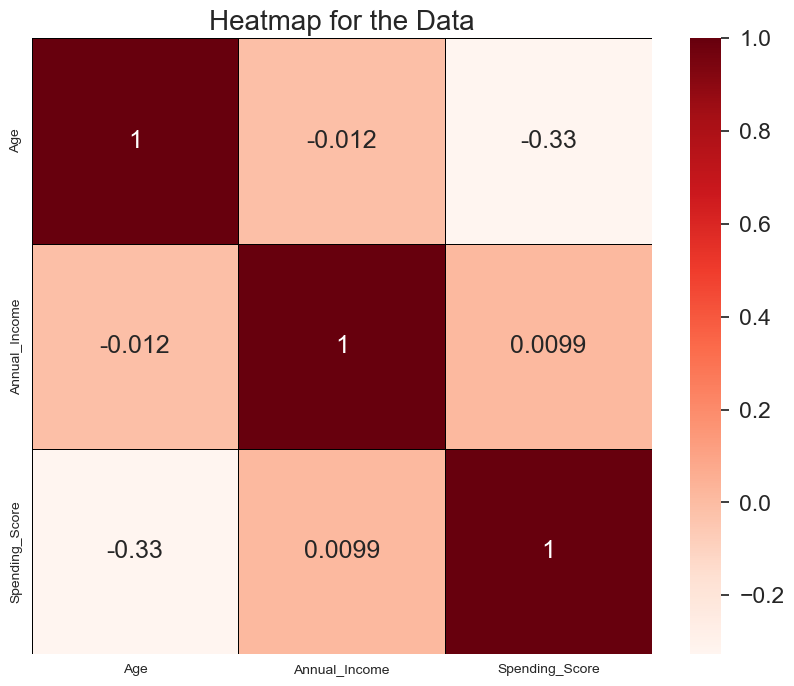

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

#### Gender Data Visualization

In [19]:
data['Gender'].head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [20]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

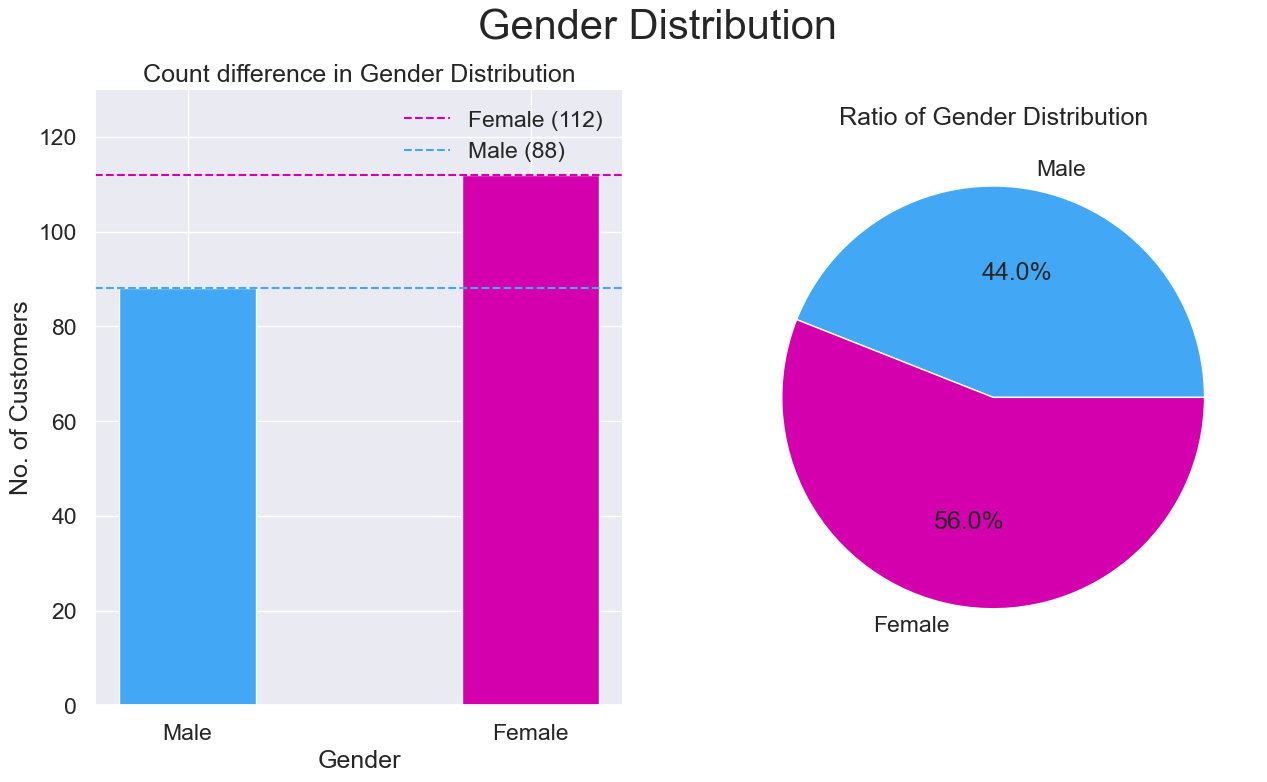

In [22]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

#### Age Data Visualization

In [23]:
data['Age'].head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [24]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [25]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

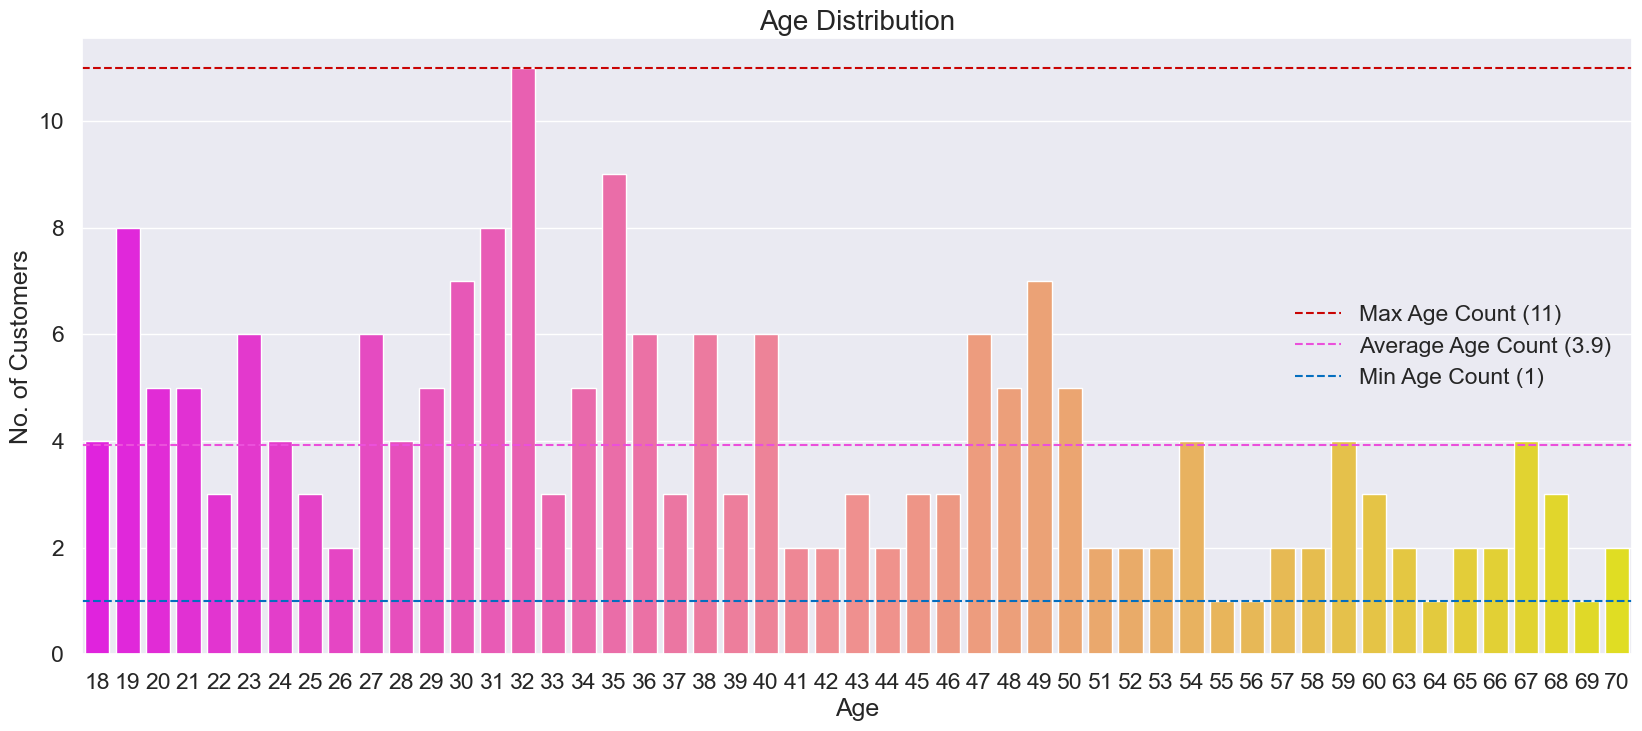

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='spring')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

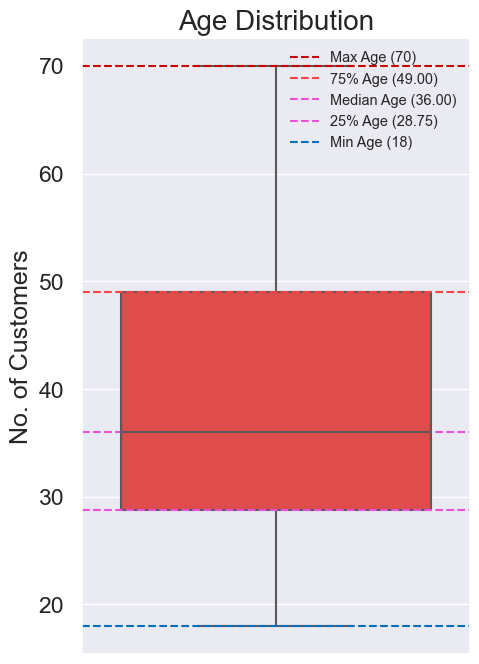

In [27]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="#f73434")
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

#### Gender Data Visualization

In [28]:
data[data['Gender']=='Male']['Age'].describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [29]:
data[data['Gender']=='Female']['Age'].describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

In [30]:
data[data['Gender']=='Male'].Age.mean()

39.80681818181818

In [31]:
data[data['Gender']=='Male'].Age.value_counts().head()

19    6
32    5
48    5
59    4
28    3
Name: Age, dtype: int64

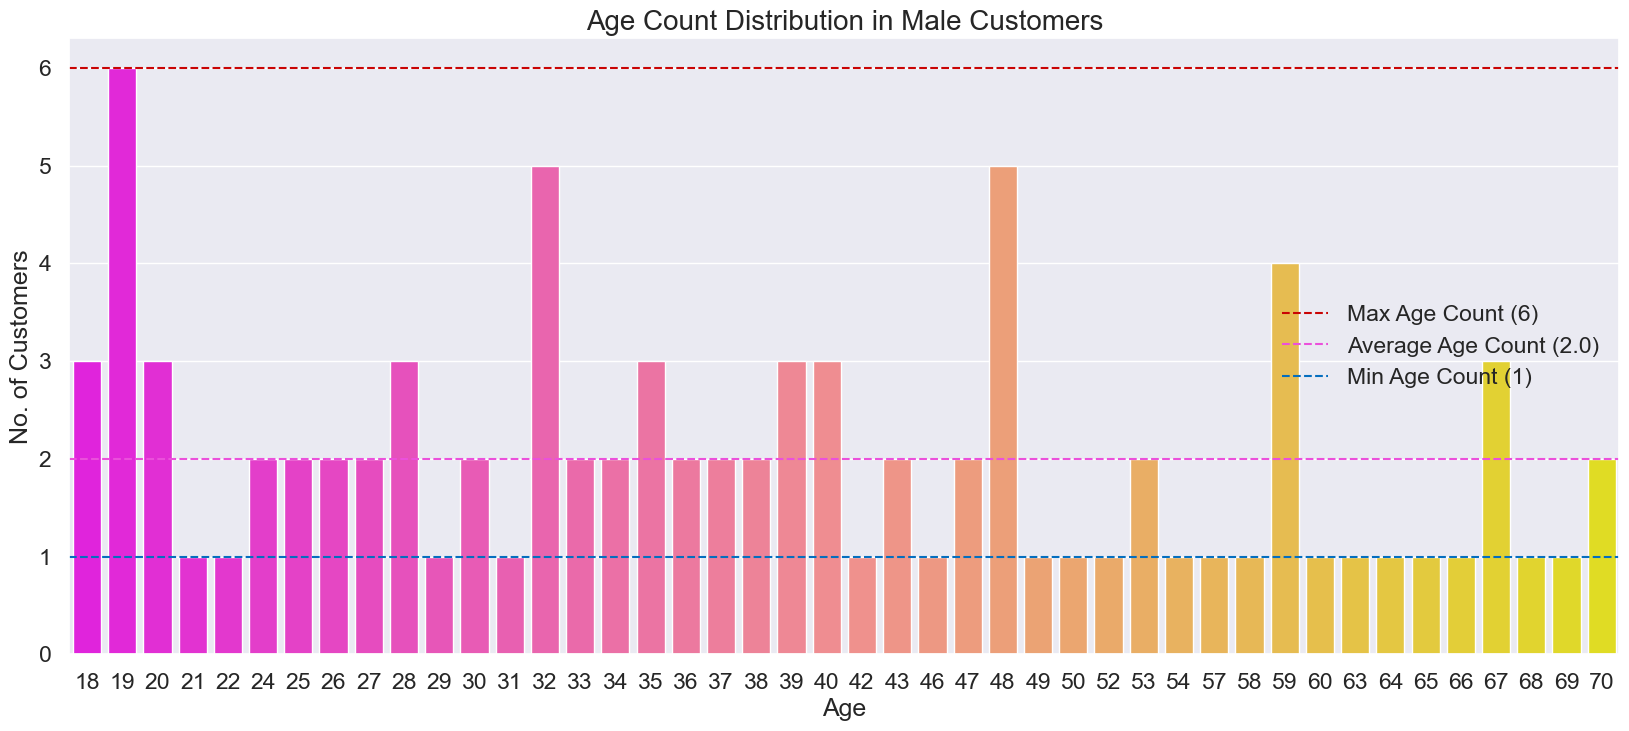

In [32]:
maxi = data[data['Gender']=='Male'].Age.value_counts().max()
mean = data[data['Gender']=='Male'].Age.value_counts().mean()
mini = data[data['Gender']=='Male'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Male'].Age, palette='spring')

ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')

ax.legend(loc ='right')

plt.title('Age Count Distribution in Male Customers', fontsize = 20)
plt.show()

In [33]:
data[data['Gender']=='Female'].Age.value_counts().head()

31    7
23    6
49    6
32    6
35    6
Name: Age, dtype: int64

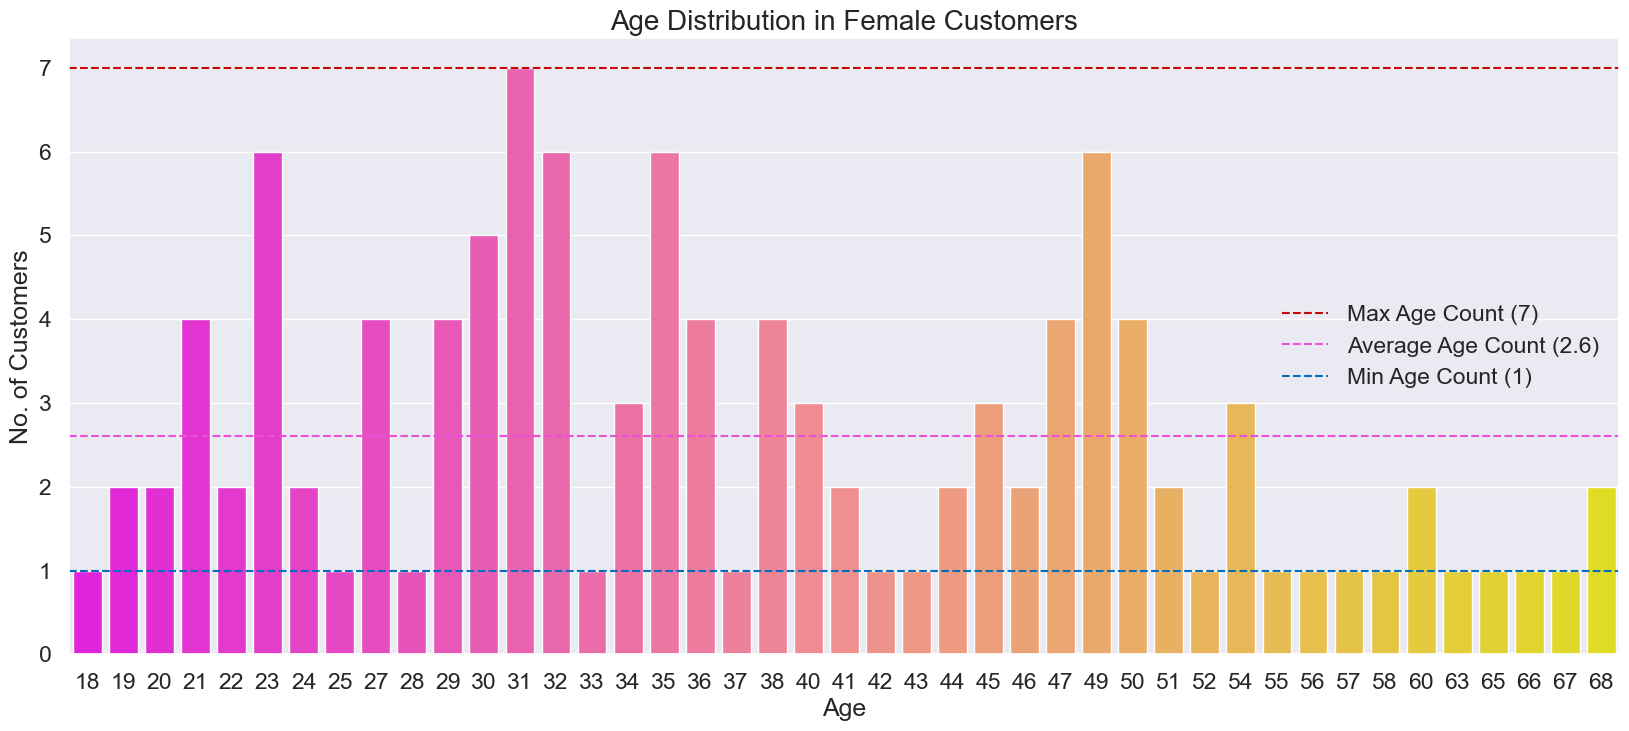

In [34]:
maxi = data[data['Gender']=='Female'].Age.value_counts().max()
mean = data[data['Gender']=='Female'].Age.value_counts().mean()
mini = data[data['Gender']=='Female'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Female'].Age, palette='spring')
ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')
ax.legend(loc ='right')

plt.title('Age Distribution in Female Customers', fontsize = 20)
plt.show()

In [35]:
data['Annual_Income'].head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [36]:
data['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

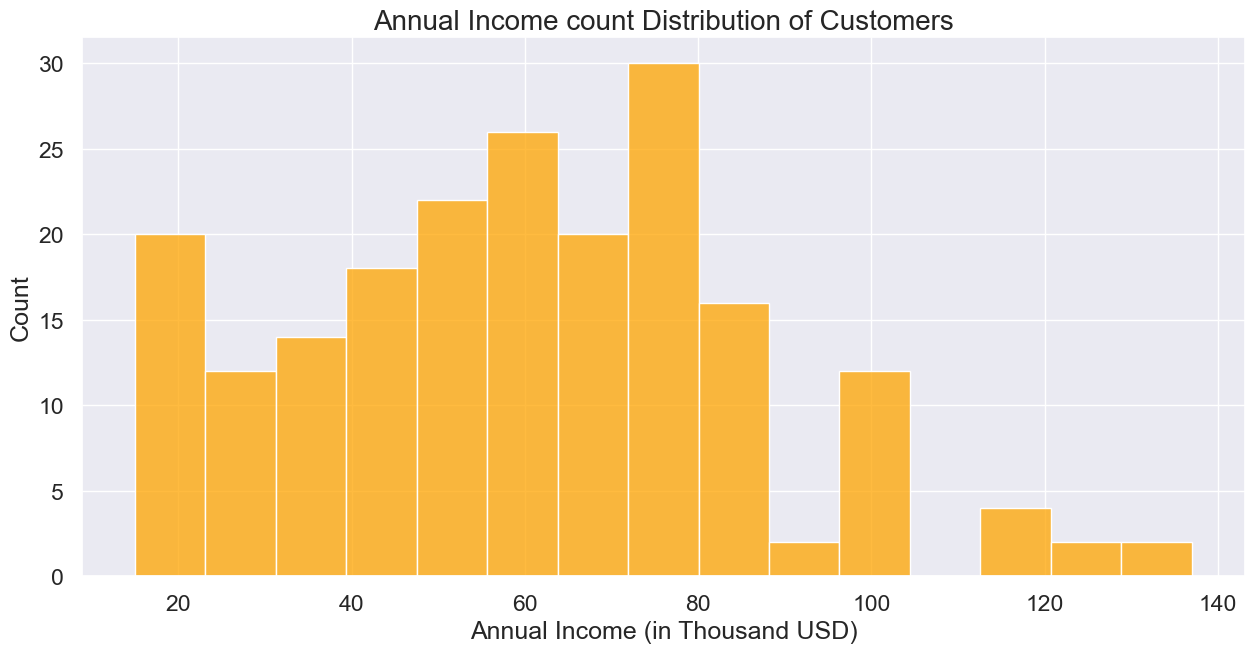

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.histplot(data['Annual_Income'], bins=15, ax=ax, color='orange')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income count Distribution of Customers', fontsize = 20)
plt.show()


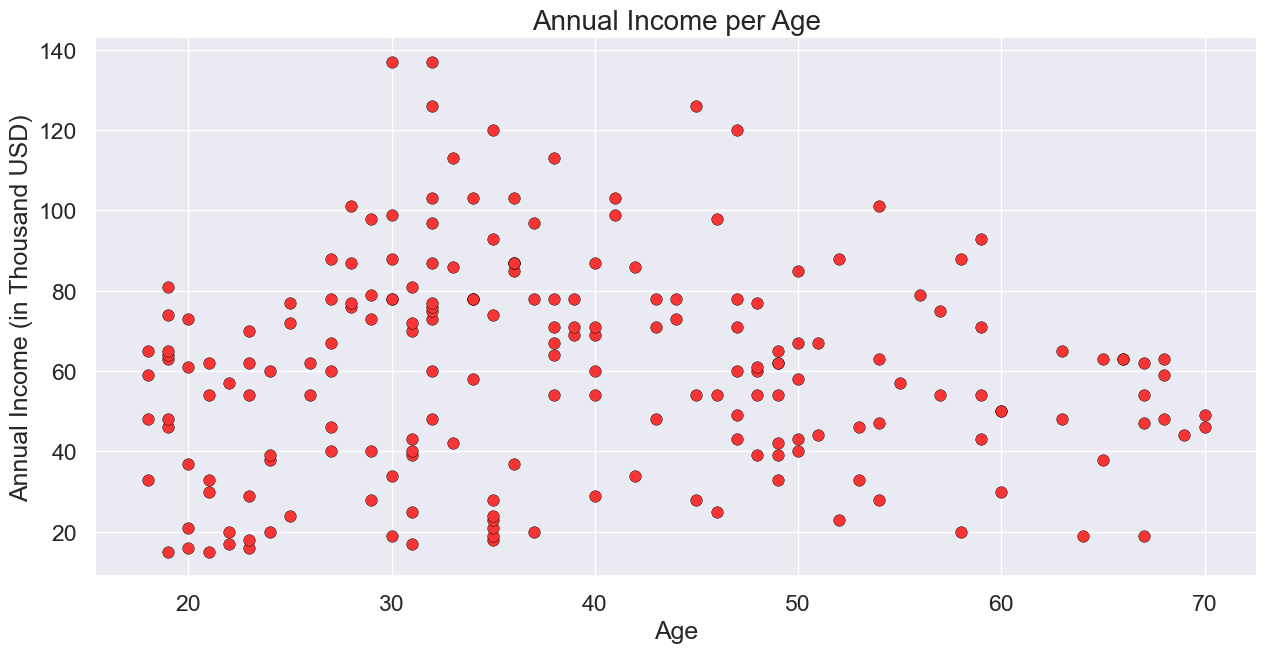

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

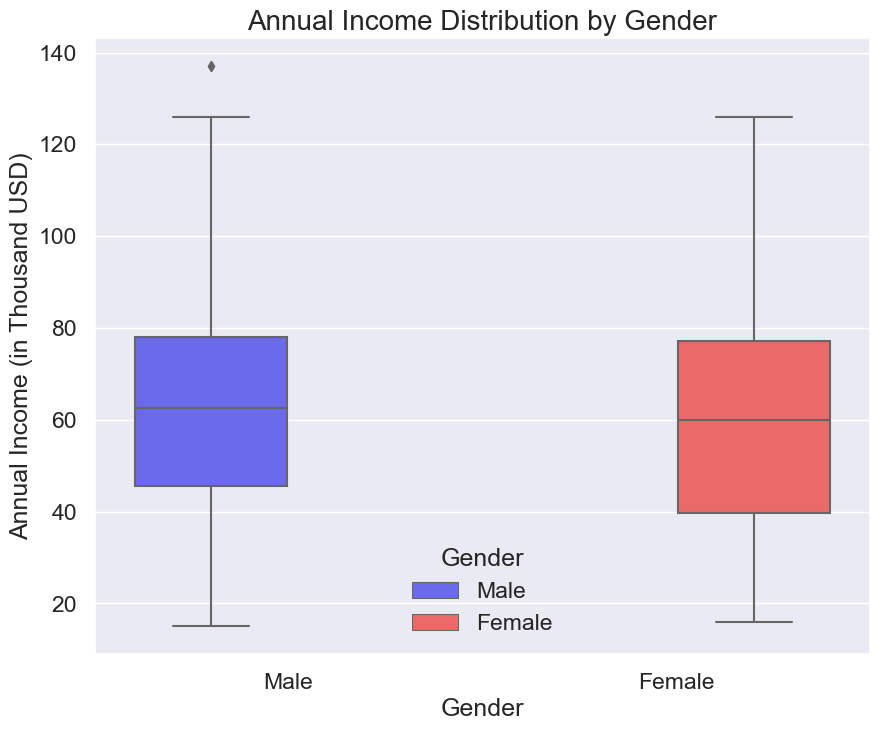

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Annual_Income"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

#### Spending score visualization

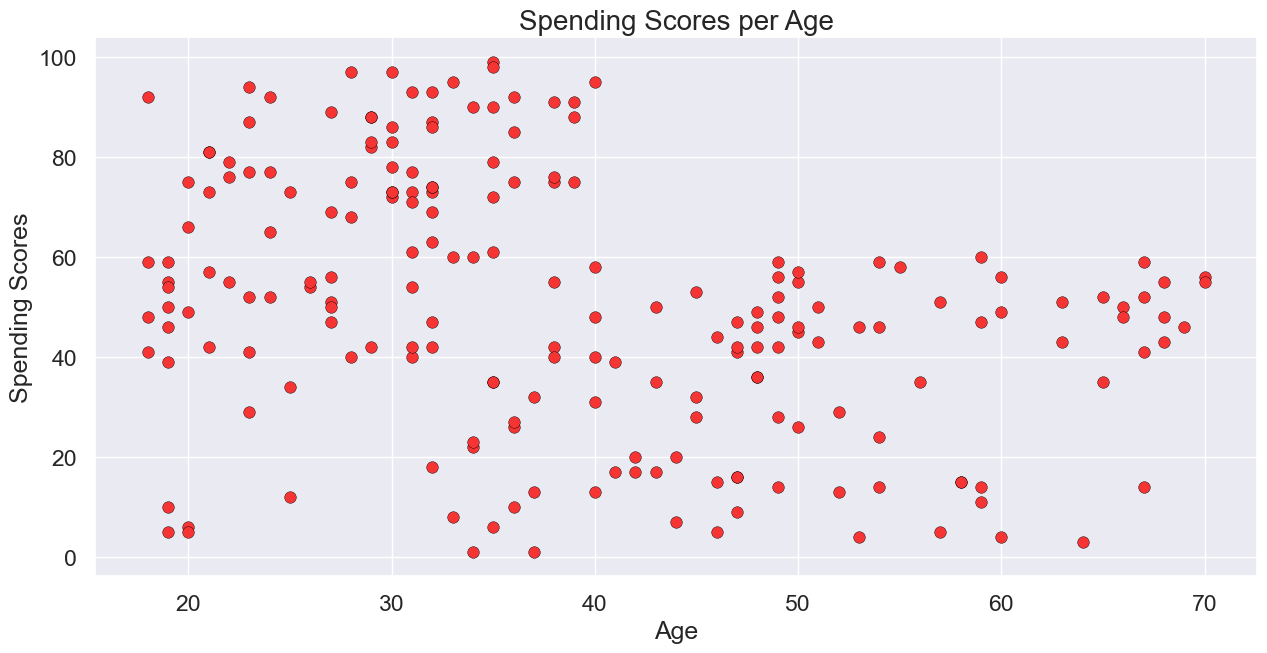

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 20)
plt.show()

In [41]:
data[data['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

In [42]:
data[data['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

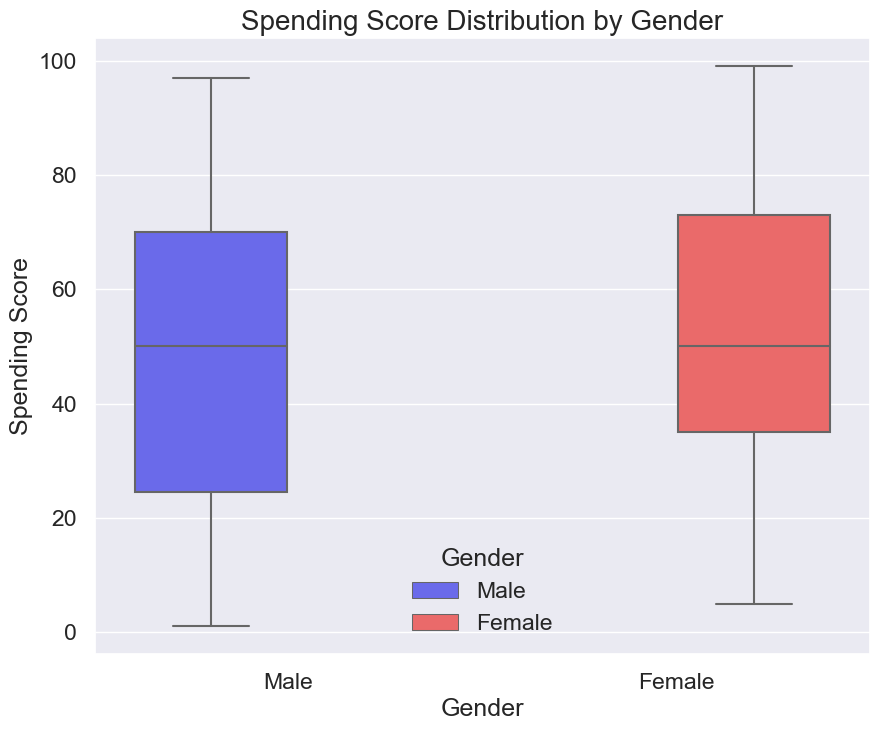

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Spending_Score"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 20)
plt.show()

#### Initial scatterplot of data

In [44]:
clustering_data = data.iloc[:,[2,3]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


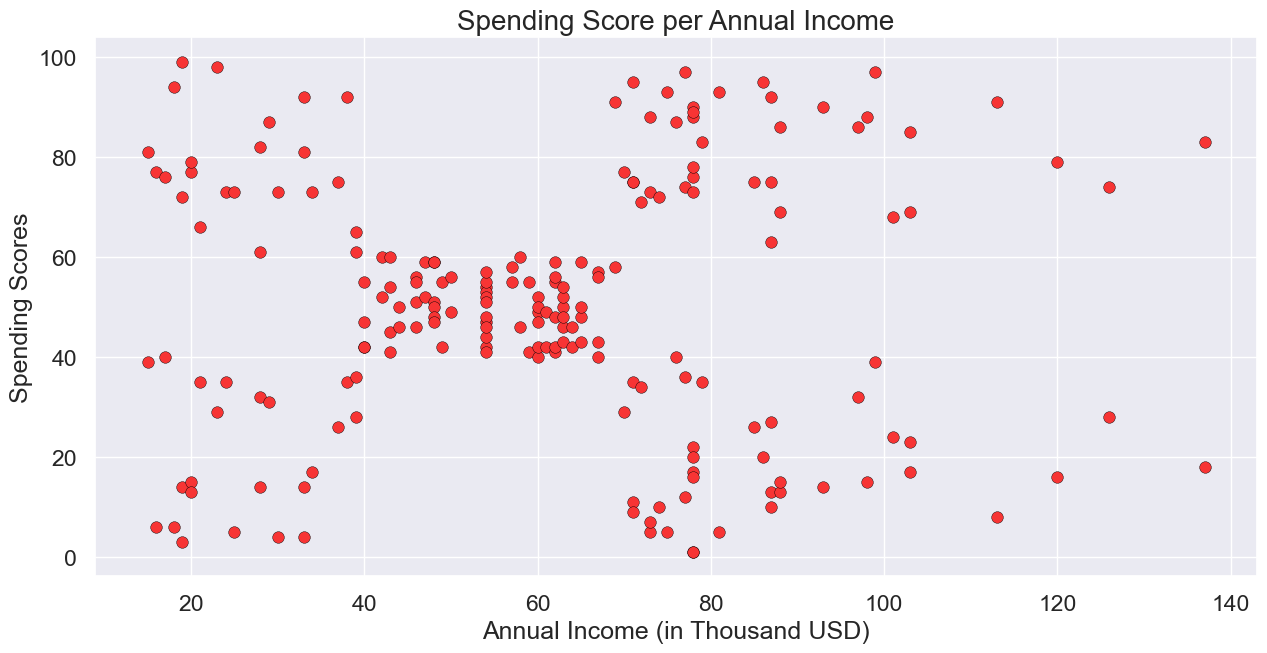

In [45]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending_Score'],x=clustering_data['Annual_Income'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

#### Applying K-Means Clustering

First trying randomly with 2 clusters

In [46]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=2, init='k-means++')
kms.fit(clustering_data)

C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [47]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1


In [48]:
kms.cluster_centers_

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

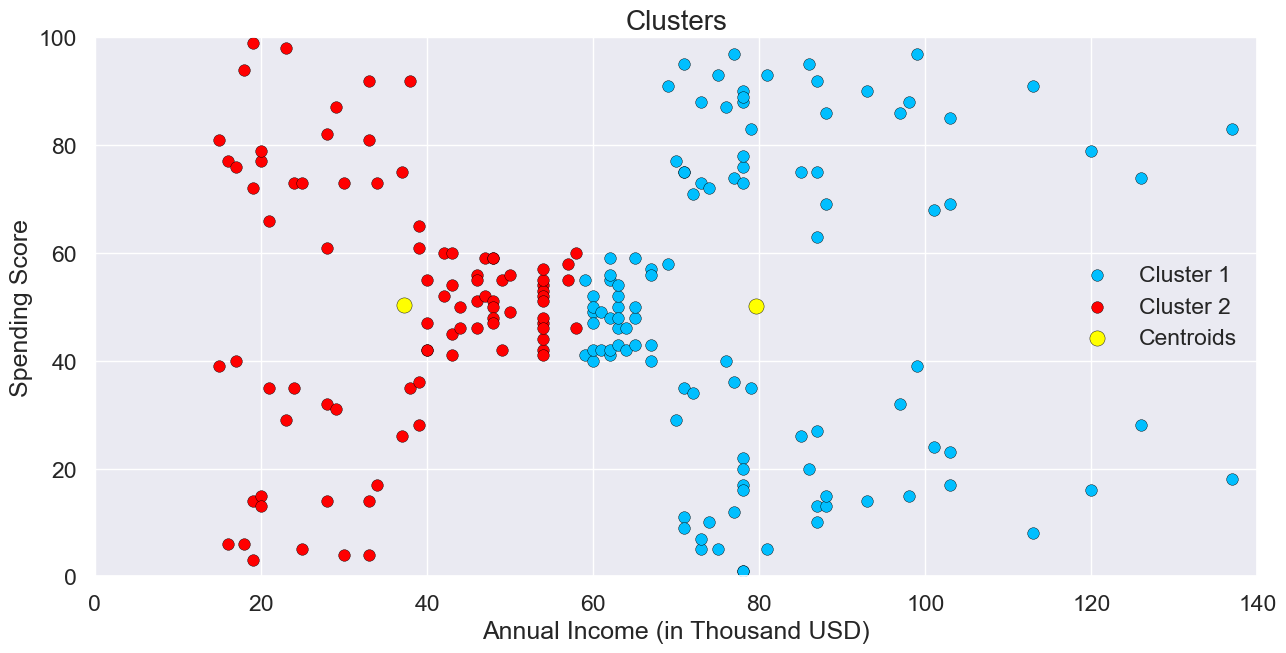

In [49]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 2')


plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

Seeing the scatterplot, it seems we can have more clusters

Trying with 3 clusters

In [50]:
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(clustering_data)
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


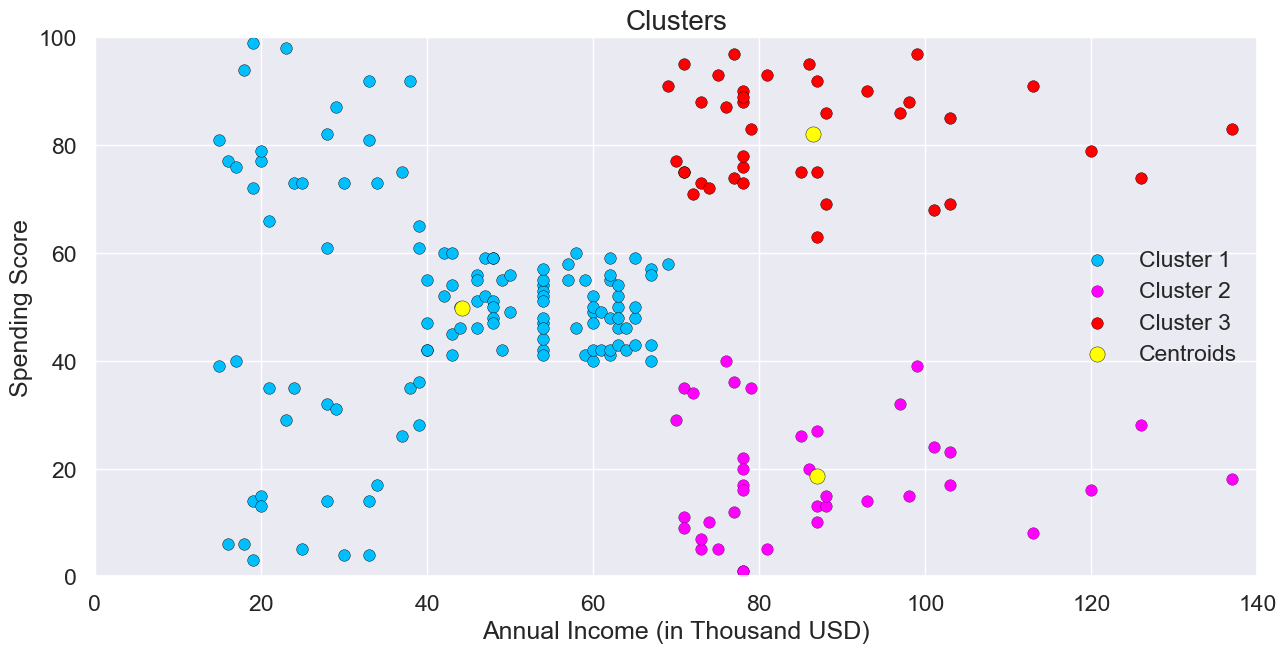

In [51]:
fig, ax = plt.subplots(figsize=(15,7)) 

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 3')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

But this hit and trial method is not good, so we use THE ELBOW METHOD to find optimal number of clusters.

#### ELBOW METHOD

**The Elbow Method**

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

![formula](images/formula.png)

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

In [52]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

array([269981.28      , 181665.82312925, 106348.37306211,  73679.78903949,
        44448.45544793,  37265.86520484,  30273.39431207,  25043.89004329,
        21838.86369283,  19636.7539649 ,  17894.72576111,  16062.91586961,
        14300.04464163,  13051.26756983,  11924.13806836,  11081.07515204,
        10057.87296616,   9662.84739285,   8682.44036326,   8003.01722806,
         7803.41882495,   7153.77257728,   6830.38477315,   6594.18549784,
         6039.55391542,   5828.54206349,   5555.6656773 ,   5212.67047952,
         5090.09166667])

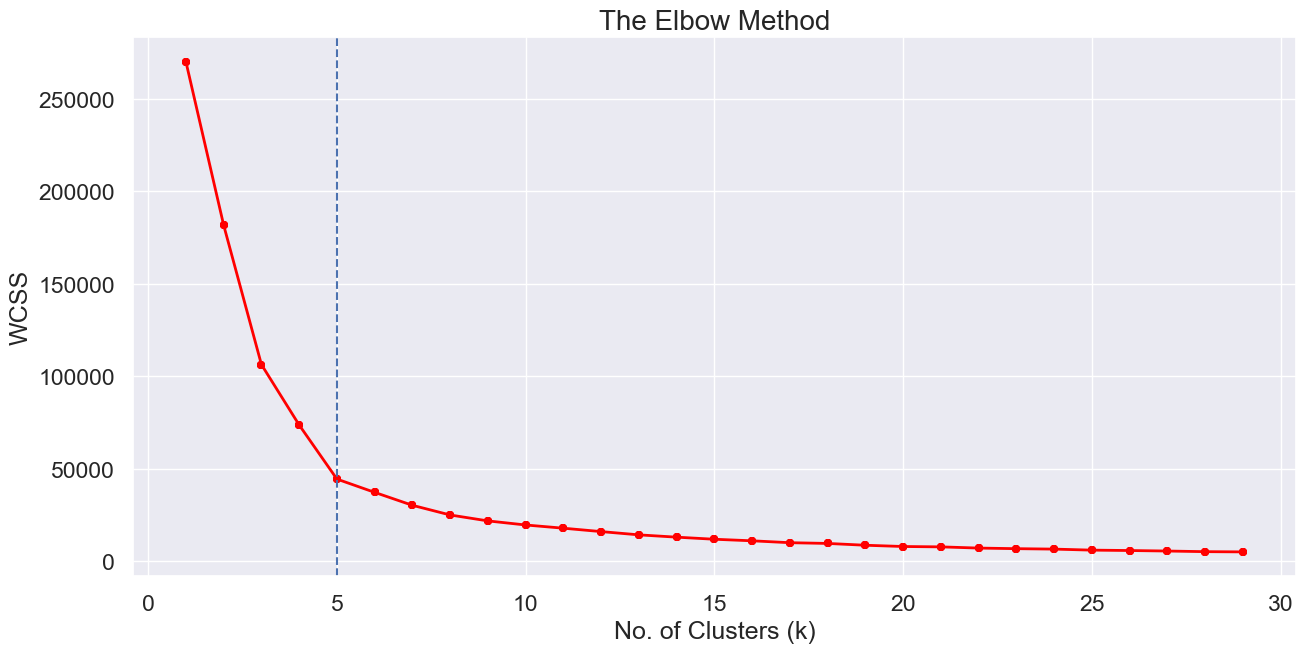

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.

Now we find clusters for K = 5

In [54]:
kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ojus chugh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1


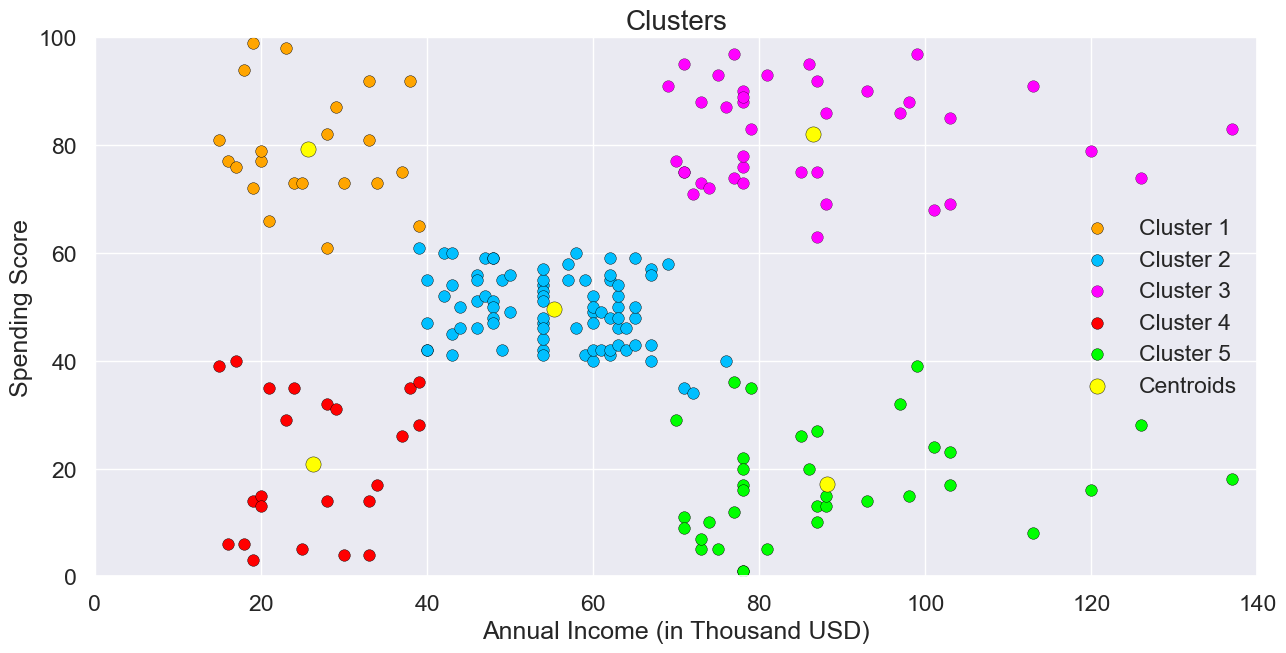

In [55]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

### Analysis

Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the 
data.
Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers.
The following clusters are created by the model, 
1. Cluster Orange
1. Cluster Blue
1. Cluster Purple
1. Cluster Red
1. Cluster Green

Visualizing all the clusters seperately

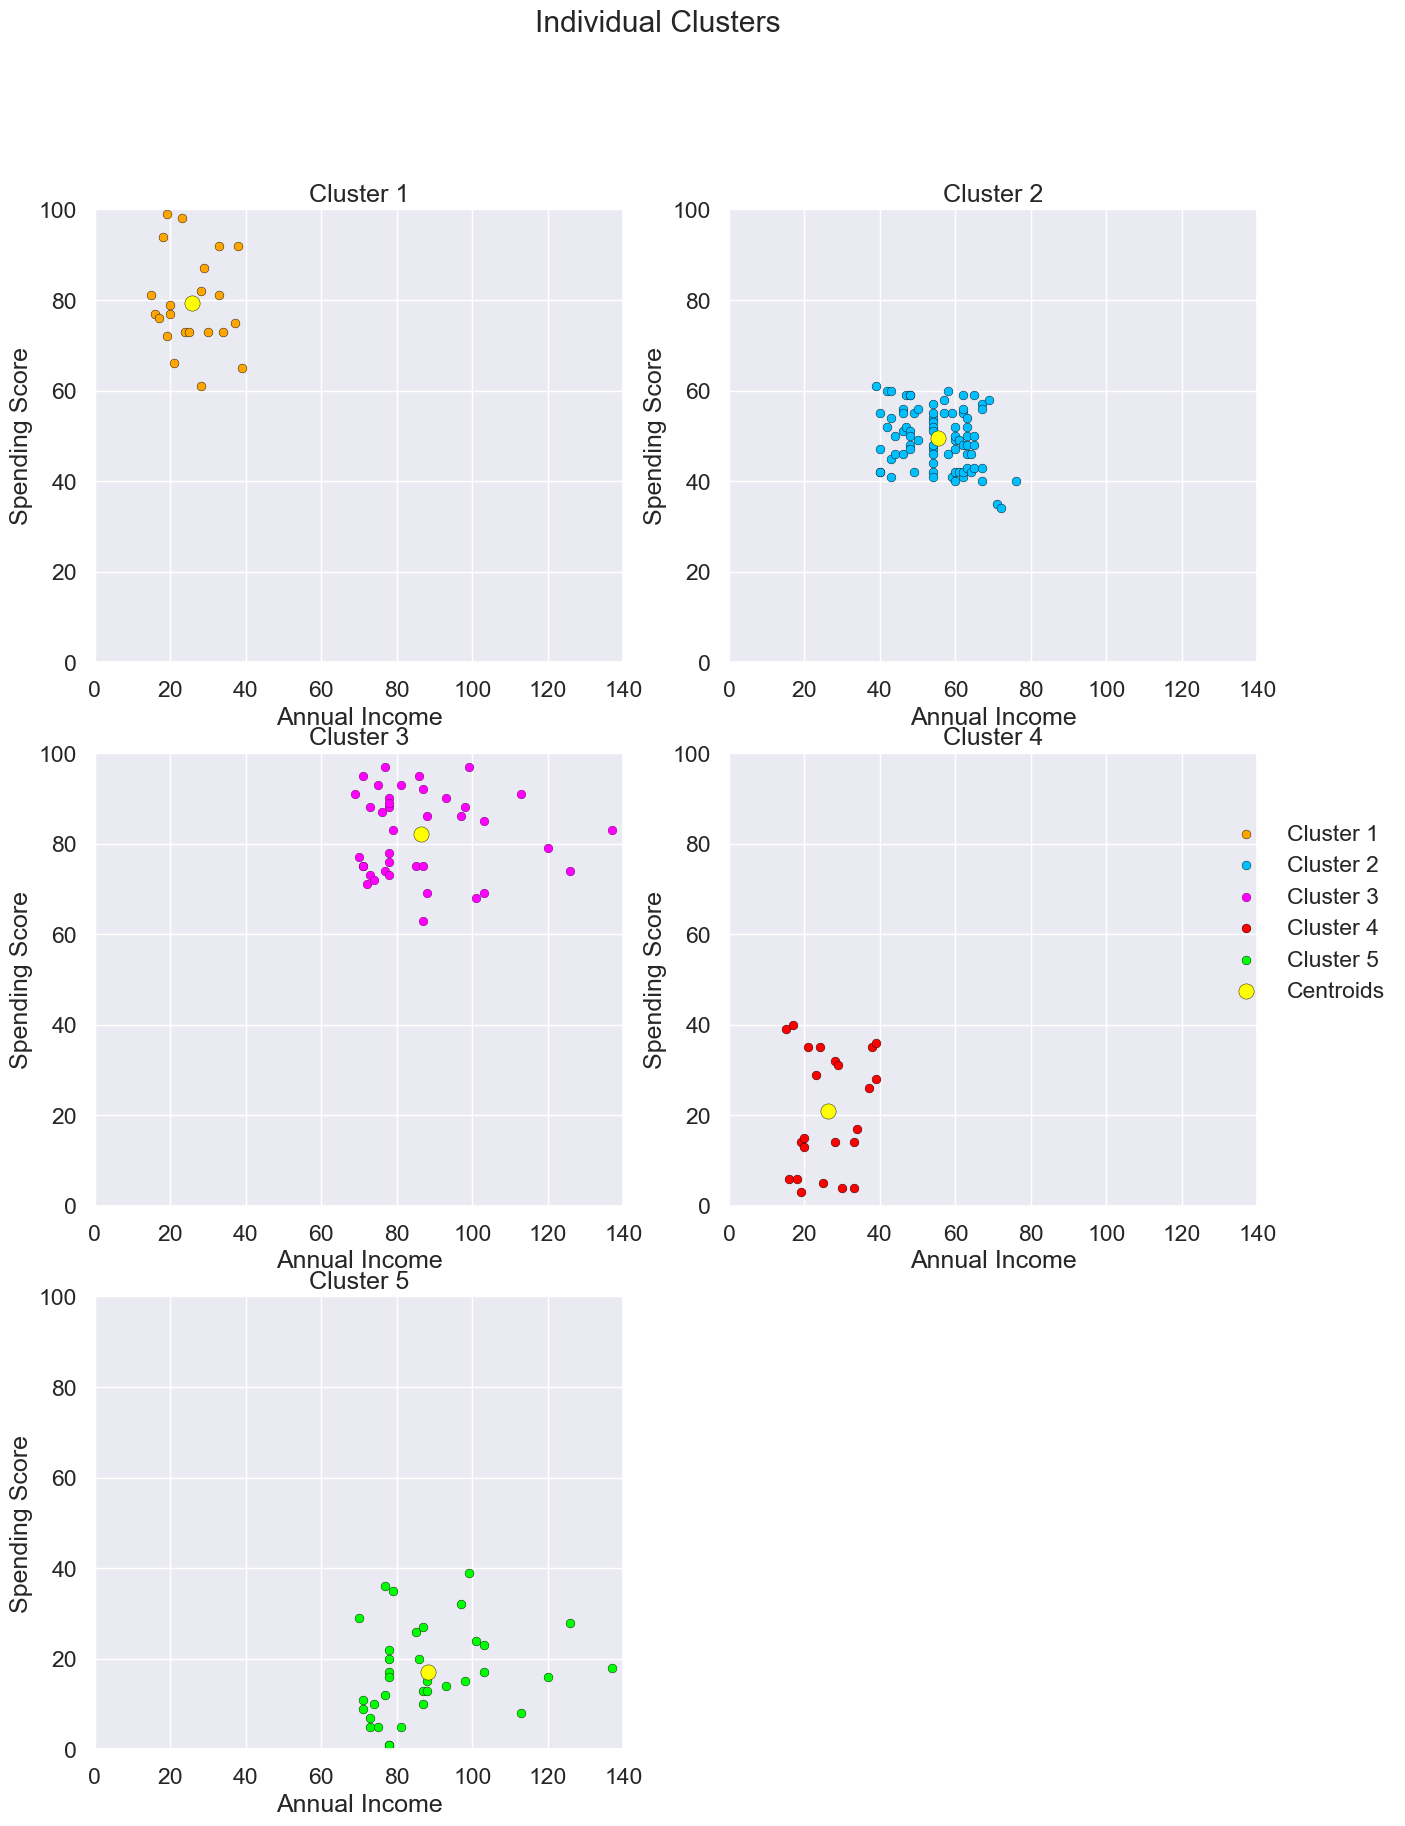

In [56]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')
ax[0,0].scatter(x=kms.cluster_centers_[4,0], y=kms.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')

ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')
ax[0,1].scatter(x=kms.cluster_centers_[0,0], y=kms.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')

ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')
ax[1,0].scatter(x=kms.cluster_centers_[2,0], y=kms.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')

ax[1,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')
ax[1,1].scatter(x=kms.cluster_centers_[1,0], y=kms.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')

ax[2,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')
ax[2,0].scatter(x=kms.cluster_centers_[3,0], y=kms.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

1. **Cluster Orange - Balanced Customers :**

    They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.
<br>
1. **Cluster Green - Misers :**

    Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.
<br>
1. **Cluster Purple - Normal Customer :**

    Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
    <br>
1. **Cluster Red - Spenders :**

    This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.
    <br>
1. **Cluster Blue - Target Customers :**

    Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

#### Trying to analyse clusters using Dendogram

In [57]:
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Converting gender to binary attribute

In [58]:
encoder = LabelEncoder()
data.Gender = pd.Series(encoder.fit_transform(data.Gender))

In [59]:
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


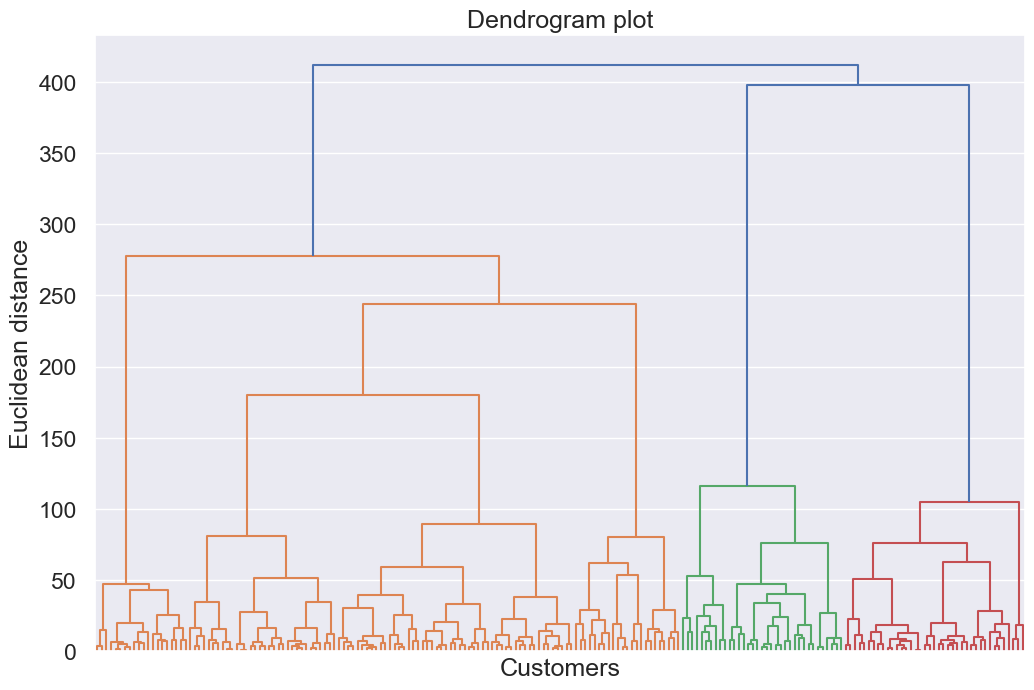

In [60]:
plt.figure(figsize=(12,8))
dend_fig = dendrogram(linkage(data, method='ward', optimal_ordering= True))
plt.title('Dendrogram plot')
plt.xlabel('Customers')
plt.xticks([])
plt.ylabel('Euclidean distance')
plt.show()

**Analysis**

Dendrograms(Agglomerative Clustering) can also show the optimal number of clusters to be chosen. The plot suggests that a number of clusters equal to 3 is optimal. There are two ways this can be infered.
Plot directly shows the optimal number of clusters in different colors. It is clear that the optimal number of clusters for the dataset should be 3.

But using the ELBOW method we found out that 5 clusters are optimal for this dataset. So for this dataset, we can infer that k-means is better for visualizing the datasets